## Prueba Fundamentos de Data Science
###  Gustavo Morales, G10 - 21.Oct.2019

☑ Hito 1 `04.Oct.2019` : Preliminares y Aspectos Computacionales.\
☐ Hito 2 `06.Oct.2019`: Descripción.\
☐ Hito 3: Modelación descriptiva.\
☐ Hito 4: Modelación predictiva.

**NOTA: Considerar categorías incompletas (☐) como WIP**

## ────── DESAFIO 2: Rendimiento escolar ──────

**ENUNCIADO**

Una escuela portuguesa requiere que se identifiquen aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Además, se requiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno y ver si se pueden abstraer en categorías latentes.

**TIPO DE PROBLEMA**

* Para poder resolver el problema de identificación de alumnos con bajo desempeño académico, se generará un modelo el cual utilizará como base los registros sociodemográficos y conductuales de los alumnos que han sido facilitados por dos escuelas para así poder realizar perfiles. La idea es generar un algoritmo de clasificación para poder obtener información usando la batería de preguntas realizada al alumno sobre aspectos ambientales.

* Se utilizarán todos los regresores (modelo saturado) para luego definir mediante correlaciones qué variables son fundamentales para nuestro modelo (modelo depurado):

    $G1 = \beta_0 + \sum_{j=1}^{N}{\beta_j * X_ij + \varepsilon_i}$

    $G2 = \beta_0 + \sum_{j=1}^{N}{\beta_j * X_ij + \varepsilon_i}$

    $G3 = \beta_0 + \sum_{j=1}^{N}{\beta_j * X_ij + \varepsilon_i}$

* Para resolver este problema se generará un modelo de clasificación ya visto en la sección de dimensionalidad. Para esto se aplicará una regresión que identificará alumnos que presentan un bajo desempeño académico dependiendo de ciertos factores.

* Finalmente mediante modelación predictiva, se generará un modelo para predecir las notas de G3 (promedio final).

**JUSTIFICACIÓN METRICAS**

Los tipos de gráficos que usaremos para evaluar tanto modelos como datos son:
* Gráfico de cajas, `boxplot`;
* Histograma, `histogram`;
* Gráfico de puntos `scatterplot` (o similares);
* Mapa de calor, `heatmap`.

La interpretación de diversos gráficos ayudará a visualizar y comprender el comportamiento tanto de los datos como de los modelos.

Para el caso de regresión se utilizarán las siguientes herramientas:
* Test de hipótesis nula
* Nivel de significancia (al 95%)
* p-values
* Coeficiente de correlación
* $R^{2}$

Dichas métricas contribuyen a evaluar una regresión. 

Dentro de la inferencia estadística, un contraste de hipótesis (también denominado test de hipótesis o prueba de significación) es un procedimiento para juzgar si una propiedad que se supone en una población estadística es compatible con lo observado en una muestra de dicha población. Se denomina hipótesis nula $H_0$ a la hipótesis que se desea contrastar. La hipótesis $H_0$ nunca se considera probada, aunque puede ser rechazada por los datos. El nivel de significancia se aplicará para definir los límites extremos de los resultados de los tests y de esta manera establecer un criterio cuantitativo para rechazar la hipótesis nula. Esto se corresponde directamente con el p-value.

El coeficiente de correlación mide la "intensidad" de una correlación entre variables, y contribuye a definir regresores significativos para el modelo.

Finalmente, el $R^{2}$ es una medida estadística que representa la proporción de la varianza de una variable dependiente que es explicada por una variable independiente (o más variables) en un modelo de regresión. Mientras el coeficiente de correlación cuantifica qué tan correlacionadas están dos variables, $R^2$ explica hasta qué punto la varianza de una variable explica la varianza de una segunda variable. Así, si $R^2=0.5$, entonces aproximadamente la mitad de la observación observada puede ser explicada o atribuida a los _inputs_ del modelo.

Para medir la aplicabilidad de la reducción de dimensionalidad sobre la base de datos, se utilizarán los tests de:
* Esferacidad de Bartlett
* Prueba de Kaiser-Meyer-Olkin 

La esferacidad de Bartlett busca testear la hipótesis (nula) de que la matriz de correlaciones es una matriz identidad (es decir, que no existe covarianza entre ítems). Esto es relevante porque al no existir covarianza, no sería práctico reducir dimensiones. Exigiremos una significancia de un 95% para indicar evidencia en contra de la hipótesis nula.

Por otro lado, la prueba KMO se aplica para discriminar factores latentes. Como consenso, valores mayores a 0.7 indican que existe al menos un factor latente.

**JUSTIFICACIÓN DE LIBRERIAS**

Utilizaré `pandas` y `numpy` para manejar los datos, transformarlos y prepararlos para el modelamiento, en conjunto con `matplotlib.pyplot` y `seaborn`, útiles para realizar gráficos pertinentes a la visualización de los datos y de los resultados. La librería `statsmodels` sirve para analizar estadísticamente la significancia de las variables en el modelamiento. A su vez, `factor_analyzer` nos dará las herramientas para el algoritmo de reducción de dimensionalidad, y sus respectivos factores latentes. Luego, `sklearn.linear_model` y `sklearn.model_selection` contienen los métodos de modelamiento predictivo, en particular `LinearRegression()` para la regresión lineal, y `train_test_split()` para generar las submuestras; mientras que `sklearn.metrics` a su vez contiene todas las métricas para cuantificar el rendimiento del modelo. Adicionalmente, `missingno` es útil para visualizar datos inválidos (NaN).

**PREPROCESAMIENTO y RECODIFICACION DE DATOS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
import statsmodels.formula.api as smf
import factor_analyzer as factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from support import *  # local support functions
plt.style.use('seaborn-notebook')

Primero veamos qué tiene el dataset:

In [2]:
df = pd.read_csv('students.csv', sep='|')
df = df.drop(columns = "Unnamed: 0")
df.sample(n=5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
327,GP,M,"""17""",R,GT3,T,2,nulidade,services,other,...,4,4,"""5""",5,5,"""4""",8,11,10,10
295,GP,M,"""17""",U,GT3,T,3,3,health,other,...,4,4,"""3""",1,3,"""5""",4,14,12,11
25,GP,F,"""16""",U,GT3,T,2,2,services,services,...,1,2,"""2""",1,3,"""5""",14,6,9,8
378,MS,F,"""18""",U,GT3,T,3,3,other,other,...,4,1,"""3""",1,2,"""1""",0,15,15,15
330,GP,M,"""18""",U,LE3,T,2,2,other,other,...,4,5,"""5""",2,4,"""5""",2,9,8,8


Ahora convertiré los valores de texto que corresponden a valores NaN, y los visualizaré:

In [3]:
df = df.replace('nulidade', np.nan)
df = df.replace('sem validade', np.nan)
df = df.replace('zero', np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null object
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc       

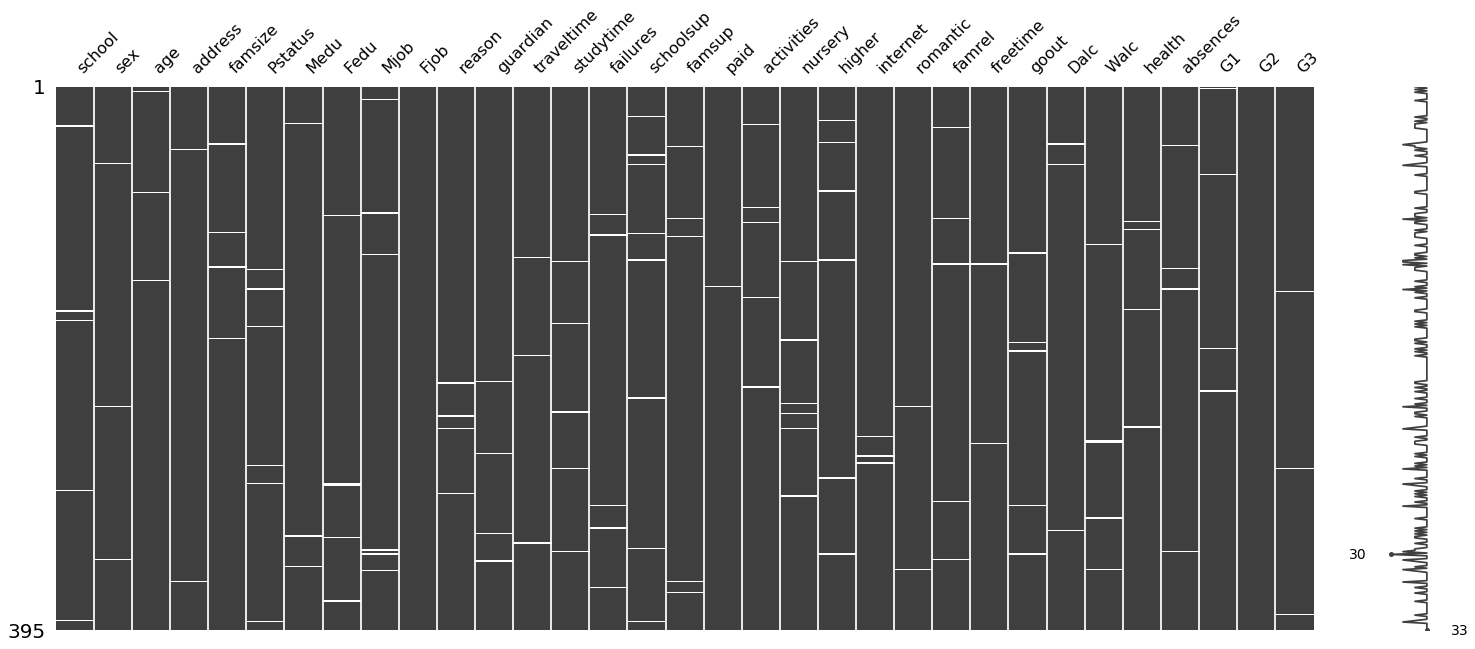

In [5]:
msno.matrix(df);

In [6]:
df.isna().mean().sort_values(ascending=False).round(3)*100

schoolsup     2.0
higher        1.5
Pstatus       1.5
Mjob          1.5
nursery       1.5
famsup        1.3
Fedu          1.3
studytime     1.3
failures      1.3
activities    1.3
school        1.3
famrel        1.3
goout         1.3
Walc          1.3
reason        1.0
health        1.0
age           1.0
famsize       1.0
G1            1.0
guardian      1.0
absences      1.0
sex           0.8
Medu          0.8
internet      0.8
traveltime    0.8
Dalc          0.8
G3            0.8
romantic      0.5
address       0.5
freetime      0.5
paid          0.3
Fjob          0.0
G2            0.0
dtype: float64

Ahora procedo a eliminar los valores inválidos:

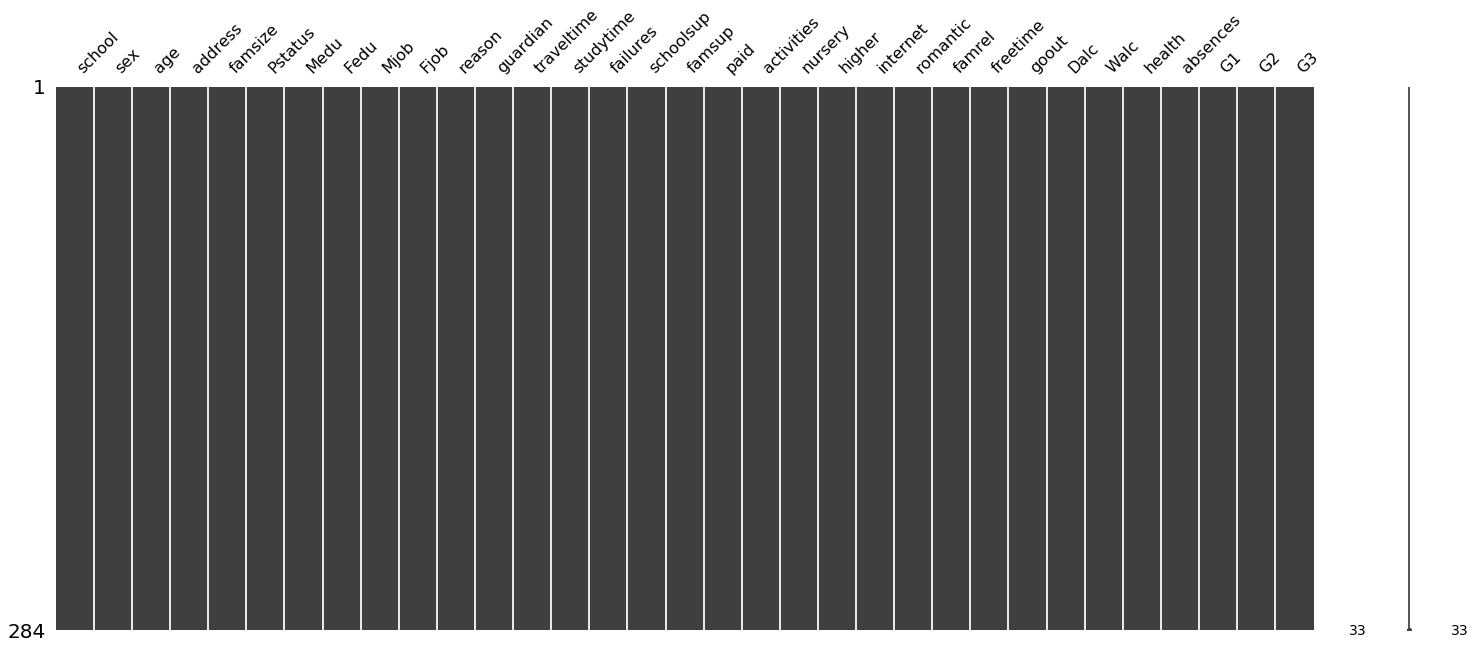

In [7]:
df = df.dropna().reset_index(drop=True)
msno.matrix(df);

Notar que en el objeto `df` hay tres columnas que contienen valores numéricos codificados como tipo `string`, por lo tanto los transformamos a tipo numérico:

In [8]:
df['age'].replace(regex=True, inplace=True, to_replace = r'\D', value = r'')
df['goout'].replace(regex=True, inplace=True, to_replace = r'\D', value = r'')
df['health'].replace(regex=True, inplace=True, to_replace = r'\D', value = r'')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 33 columns):
school        284 non-null object
sex           284 non-null object
age           284 non-null object
address       284 non-null object
famsize       284 non-null object
Pstatus       284 non-null object
Medu          284 non-null object
Fedu          284 non-null object
Mjob          284 non-null object
Fjob          284 non-null object
reason        284 non-null object
guardian      284 non-null object
traveltime    284 non-null object
studytime     284 non-null object
failures      284 non-null object
schoolsup     284 non-null object
famsup        284 non-null object
paid          284 non-null object
activities    284 non-null object
nursery       284 non-null object
higher        284 non-null object
internet      284 non-null object
romantic      284 non-null object
famrel        284 non-null object
freetime      284 non-null object
goout         284 non-null object
Dalc       

In [10]:
cols_to_int = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
               'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G3']

In [11]:
for col in df.columns.tolist():
    if col in cols_to_int:
        df[col] = df[col].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 33 columns):
school        284 non-null object
sex           284 non-null object
age           284 non-null int64
address       284 non-null object
famsize       284 non-null object
Pstatus       284 non-null object
Medu          284 non-null int64
Fedu          284 non-null int64
Mjob          284 non-null object
Fjob          284 non-null object
reason        284 non-null object
guardian      284 non-null object
traveltime    284 non-null int64
studytime     284 non-null int64
failures      284 non-null int64
schoolsup     284 non-null object
famsup        284 non-null object
paid          284 non-null object
activities    284 non-null object
nursery       284 non-null object
higher        284 non-null object
internet      284 non-null object
romantic      284 non-null object
famrel        284 non-null int64
freetime      284 non-null int64
goout         284 non-null int64
Dalc          284 no

Ahora procedemos a binarizar las columnas del dataframe, tanto binarias como con múltiples categorías:

In [13]:
df_backup = df.copy()
binarize_binary(df)

In [14]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
70,0,0,15,1,0,0,1,1,at_home,other,...,3,1,2,1,1,1,2,7,10,10
252,1,0,17,1,0,0,4,4,teacher,services,...,4,3,3,1,2,5,4,12,13,13
53,0,0,15,1,0,0,1,1,other,other,...,3,3,4,2,4,5,2,8,6,5
159,0,0,16,0,0,0,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
260,1,1,18,0,1,0,4,4,teacher,services,...,4,2,2,2,2,5,0,13,13,13


In [15]:
cols = binarize(df)
df.drop(columns=cols, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 42 columns):
school                   284 non-null int64
sex                      284 non-null int64
age                      284 non-null int64
address                  284 non-null int64
famsize                  284 non-null int64
Pstatus                  284 non-null int64
Medu                     284 non-null int64
Fedu                     284 non-null int64
traveltime               284 non-null int64
studytime                284 non-null int64
failures                 284 non-null int64
schoolsup                284 non-null int64
famsup                   284 non-null int64
paid                     284 non-null int64
activities               284 non-null int64
nursery                  284 non-null int64
higher                   284 non-null int64
internet                 284 non-null int64
romantic                 284 non-null int64
famrel                   284 non-null int64
freetime       

## ────── FIN HITO 1 ──────